In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Load a simple dataset (e.g., Iris dataset) from sklearn
# The iris dataset contains 150 samples of iris flowers with 4 features 
#                (sepal length, sepal width, petal length, petal width)
# We will classify the flowers into 3 different species.
iris = datasets.load_iris()

In [5]:
# X: Features, y: Labels
X = iris.data  # shape (150, 4) - 150 samples with 4 features each
y = iris.target  # shape (150,) - Target labels (species)

In [7]:
# Split the dataset into training and testing sets
# We use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize an SVM classifier with a linear kernel
# C is set to 1.0 by default. Here we're using the basic linear kernel.
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

In [11]:
# Train the model using the training data
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [13]:
# After training, predict labels for the test set
y_pred = svm_classifier.predict(X_test)


In [15]:
# Evaluate the accuracy of the model by comparing predicted vs true labels
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [17]:
# Print the classification report for a detailed breakdown of precision,  
#                                   recall, F1 score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [19]:
# Print the confusion matrix to see the performance visually
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [21]:
# Load only the first two features
X_simplified = iris.data[:, :2]
X_train_simplified, X_test_simplified, y_train_simplified, y_test_simplified = train_test_split(X_simplified, y, test_size=0.2,random_state=42)

In [23]:
# Initialize SVM classifier again for the simplified data (only 2 features)
svm_classifier_simplified = SVC(kernel='linear', C=1.0)
svm_classifier_simplified.fit(X_train_simplified, y_train_simplified)

SVC(kernel='linear')

In [25]:
# Create a mesh grid to plot decision boundaries
x_min, x_max = X_simplified[:, 0].min() - 1, X_simplified[:, 0].max() + 1
y_min, y_max = X_simplified[:, 1].min() - 1, X_simplified[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

In [27]:
# Predict labels for each point in the mesh grid
Z = svm_classifier_simplified.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

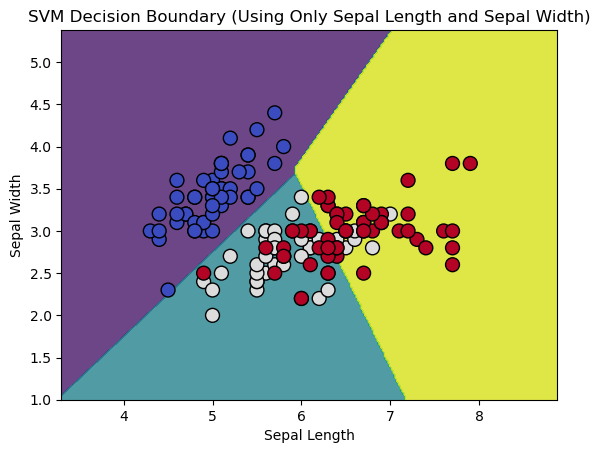

In [29]:
# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_simplified[:, 0], X_simplified[:, 1], c=y, edgecolors='k',  
             marker='o', s=100, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM Decision Boundary (Using Only Sepal Length and Sepal Width)')
plt.show()